DAVIDE VALENTINI  1088760  
Stochastics and Data Science

davide.valentini367@edu.unito.it

# **OBJECTIVE 1: **
How much the increment of a variable leads to an increase of sales

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split


Import of the datasets

In [70]:
market = pd.read_csv('market.csv')
sales = pd.read_csv('sales.csv')

Control that the datasets have been imported correctly

In [71]:
print(sales.shape)
print(market.shape)

(523949, 5)
(750, 8)


Here I start cleaning Sales dataset

The last column is composed only of NaN, therefore I rename it an drop ( since it has no name I have to firstly give it a name )

In [72]:
sales.columns = ['market_id', 'date', 'is_open', 'sales_amount', 'adios']
sales = sales.drop('adios', axis=1)

Here I check how many NaN I have left

In [73]:
sales.isnull().sum()

market_id        1
date             1
is_open          1
sales_amount    15
dtype: int64

data number 477294 is composed only of NaN and is the one that appears in previous cell in all columns, so I drop it

In [74]:
for i in range(len(sales)):
  if str(sales['market_id'][i]) == 'nan':
     print(sales.iloc[i])
#477294
sales.drop(index=477294, inplace= True)
sales = sales.reset_index(drop=True)


market_id       NaN
date            NaN
is_open         NaN
sales_amount    NaN
Name: 477294, dtype: object


Here I'm identifying all last NaN, which are all in column sales amount.
Then I'm substituing their value with the mean with respect to their market type and country

In [75]:
l= sales['sales_amount'].isnull()
a=[]; b=[]
#nan index
for i in range(len(l)):
  if l[i] == True:
    a.append(i)

#nan id
for i in range(len(a)):
   b.append(sales['market_id'].iloc[a[i]])

#substitution
for i in range(len(a)):
  sales['sales_amount'].iloc[a[i]] = sales[(sales['market_id'] == b[i]) & (sales['is_open'] == 'YES')].loc[:,'sales_amount'].mean()


<ipython-input-75-ff75b5a9f185>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['sales_amount'].iloc[a[i]] = sales[(sales['market_id'] == b[i]) & (sales['is_open'] == 'YES')].loc[:,'sales_amount'].mean()


Fast check that I have dealt with all NaN

In [76]:
sales['sales_amount'].isnull().sum()

0

Here I check that markets which are closed do not have any sales

In [77]:
print(sales[(sales['is_open'] == 'NO') & (sales['sales_amount'] != 0)])
sales['sales_amount'].iloc[753] = 0

    market_id        date is_open  sales_amount
753      EE84  30/12/2022      NO     9999999.0


<ipython-input-77-49f1116f193b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['sales_amount'].iloc[753] = 0


Since there are markets ( only one ) that have days in which they are open but have negative sales, I substitute it with the mean of that market

In [78]:
sales[sales['sales_amount']<0]

mean_sales_amount_XC14= sales[(sales['market_id']=="XC14") & (sales['is_open']=="YES")]['sales_amount'].mean()

idx_less_zero = sales[sales['sales_amount']<0 ].index#.tolist()


for i in idx_less_zero:
    sales['sales_amount'].replace(to_replace= sales.iloc[i] ['sales_amount'], value= mean_sales_amount_XC14, inplace= True)





In [12]:
(sales['sales_amount']<0).sum()

0

Here I'm checking all unique data in column is_open which should be only YES and NO, but there is a YESS, so I'm switching it with a YES

In [79]:
#is_open
is_open_list = sales['is_open'].unique().tolist()
is_open_list.pop(0); is_open_list.pop(0)

print(sales[sales['is_open'] == 'YESS'].index.tolist())

sales['is_open'].iloc[49154] = 'YES'


[49154]


<ipython-input-79-5f8345faeeb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['is_open'].iloc[49154] = 'YES'


In [80]:
#only  YES e NO ?
sales['is_open'].unique().tolist()

['YES', 'NO']

Now I start cleaning Market dataset

As in Sales there is a column made only of NaN, so I'm removing it

In [81]:
print(market.isnull().sum())

market_header = market.columns.values.tolist()
market_header = ['id','country'] + ['adios'] + market_header[3:]
market.columns = market_header
market = market.drop('adios',axis=1)


id                       0
country                  0
Unnamed: 2             750
market_type              2
square_feet              0
avg_customers            1
competitor_distance      0
has_promotions           0
dtype: int64


In [82]:
market.isnull().sum()

id                     0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64

Here I check country column and there is no problem

In [83]:
market['country'].unique().tolist()

['SPAIN', 'FRANCE', 'ITALY']

Here I'm checking that there are no negative or 0 value in square feet column

In [84]:
market[market['square_feet']<=0]

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions


Same but whith the average number of daily customers and here I find one and substitute it whith the mean ( wrt his kind of market )

In [85]:
print(market[market['avg_customers']<=0])
market['avg_customers'].iloc[69] = market[market['market_type'] == 'HYPER']['avg_customers'].mean()

      id country market_type  square_feet  avg_customers  competitor_distance  \
69  IP89   SPAIN       HYPER        15560        -9999.0                 6281   

   has_promotions  
69            YES  


<ipython-input-85-6b949d93e5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['avg_customers'].iloc[69] = market[market['market_type'] == 'HYPER']['avg_customers'].mean()


Fast check that there are no competitor at distance less than 0 with our markets.
I'm accepting distances equal to 0 since it could be that markets are inside a shopping mall and there could be more markets

In [86]:
market[market['competitor_distance'] < 0]

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions


Here I check that there is no store with a negative or 0 average number of daily customers

In [87]:
print(market[market['avg_customers'] <= 0])

Empty DataFrame
Columns: [id, country, market_type, square_feet, avg_customers, competitor_distance, has_promotions]
Index: []


Here I'm checking that column has_promotions has no other data other than YES or NO

In [88]:
market['has_promotions'].unique().tolist()

['YES', 'NO']

Now I want to treat NaN

In [89]:
print(market.isnull().sum())

id                     0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64


First of all I'm identifying NaN inside avg_customers and I'm substituting it whith the mean ( whith respect to the country of the market and it's type )

In [90]:
temp = []
for i in range(len(market)):
   if np.isnan(market['avg_customers'][i]) == True:
      temp.append(i)

market['avg_customers'][temp[0]] = market[market['market_type'] == 'HYPER'].loc[:,'avg_customers'].mean()
print(market.isnull().sum());




id                     0
country                0
market_type            2
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64


<ipython-input-90-d1e5d4125713>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['avg_customers'][temp[0]] = market[market['market_type'] == 'HYPER'].loc[:,'avg_customers'].mean()


Lastly I treat market_type column and since there are only 2, I decide to assign them the market type based on square feet, so I look at the average square feet for each type of market and assign them

In [91]:
a=[]
for i in range(len(market)):
   if str(market.loc[i,'market_type']) == 'nan':
      a.append(i) #90, 225
print(a)

print(market.iloc[90]['square_feet'])
print(market.iloc[225]['square_feet'])

[90, 225]
14305
1520


In [92]:
print(market[market['market_type'] == 'HYPER']['square_feet'].mean())
print(market[market['market_type'] == 'SUPER']['square_feet'].mean())
print(market[market['market_type'] == 'MINI']['square_feet'].mean())

12090.54945054945
6054.496
2009.958230958231


In [93]:
market['market_type'].iloc[90] = 'HYPER'
market['market_type'].iloc[225] = 'MINI'

<ipython-input-93-ce9168cbe760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['market_type'].iloc[90] = 'HYPER'
<ipython-input-93-ce9168cbe760>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['market_type'].iloc[225] = 'MINI'


# **Collapse sales dataset, merge and save**

What I want to do now is merge sales and market datasets, but before that I check that Id's coincide

In [94]:
stores_id_sales = sales['market_id'].unique().tolist()
stores_id_market = market['id'].unique().tolist()

a=[]
for i in stores_id_sales:
  if i not in stores_id_market:
    a.append(i)

if len(a) != 0:
  print('there is a problem whith Id, sorry')
else:
  stores_id = stores_id_sales

Now we collapse sales dataset and merge it whith market.
To do that we compute the average sales amount and how much each store was opened, also we drop date column, since it has no importance to us

In [95]:
sales = sales.drop('date',axis=1)

Here I'm encoding column is_open, YES = 1, NO = 0, then I'm appending the average opening time to a list based on store id list, in this way I'm ensuring that I will have all in order

In [96]:
for i in range(len(sales)):
  if sales.loc[i,'is_open']=='YES':
    sales.loc[i,'is_open'] = 1
  else:
    sales.loc[i,'is_open'] = 0

avg_opening = []
for i in stores_id:
  avg_opening.append(sales[sales['market_id'] == i]['is_open'].mean())

Here I'm appending to avg_sales the average sales following the order of store Id, as before

In [98]:
avg_sales = []
for i in stores_id:
  avg_sales.append(sales[sales['market_id'] == i]['sales_amount'].mean())

Here I collapse my sales dataframe

In [99]:
new_sales = {'id': stores_id,
             'opening_percentage': avg_opening,
             'avg_sales_amount':avg_sales}
sales_compact = pd.DataFrame(new_sales)

And merge them

In [100]:
merged_df = pd.merge(market, sales_compact, on = 'id', how = 'inner')

In [101]:
merged_df

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions,opening_percentage,avg_sales_amount
0,XC14,SPAIN,HYPER,11135,773.0,515,YES,0.830137,50223.229492
1,WG25,FRANCE,MINI,1402,252.0,522,YES,0.832877,10418.686479
2,UX72,FRANCE,MINI,1452,265.0,15939,YES,0.827397,10201.225137
3,EE84,SPAIN,HYPER,15259,874.0,754,YES,0.832877,52161.938041
4,RF54,FRANCE,MINI,2497,191.0,34007,YES,0.826027,9983.017178
...,...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356.0,4424,YES,0.830137,19577.509603
746,WW60,FRANCE,HYPER,10923,907.0,41359,YES,0.828767,50924.988233
747,LU14,ITALY,SUPER,5742,397.0,2841,YES,0.827397,19612.729329
748,HY57,ITALY,MINI,2495,228.0,3848,YES,0.827397,9446.582438


In [102]:
merged_df.to_csv('merged_df', index = False)

# **still OBJECTIVE 1, but after cleaning**

In [103]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
merged_df = pd.read_csv('merged_df')
merged_df

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions,opening_percentage,avg_sales_amount
0,XC14,SPAIN,HYPER,11135,773.0,515,YES,0.830137,50223.229492
1,WG25,FRANCE,MINI,1402,252.0,522,YES,0.832877,10418.686479
2,UX72,FRANCE,MINI,1452,265.0,15939,YES,0.827397,10201.225137
3,EE84,SPAIN,HYPER,15259,874.0,754,YES,0.832877,52161.938041
4,RF54,FRANCE,MINI,2497,191.0,34007,YES,0.826027,9983.017178
...,...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356.0,4424,YES,0.830137,19577.509603
746,WW60,FRANCE,HYPER,10923,907.0,41359,YES,0.828767,50924.988233
747,LU14,ITALY,SUPER,5742,397.0,2841,YES,0.827397,19612.729329
748,HY57,ITALY,MINI,2495,228.0,3848,YES,0.827397,9446.582438


# **DATA VISUALIZATION**

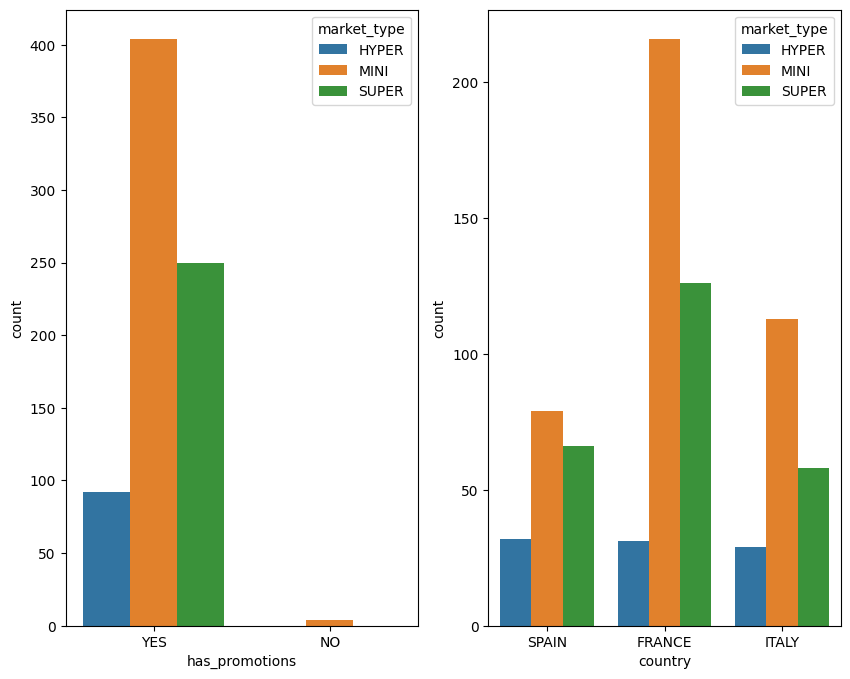

In [106]:
interesting_columns = ['has_promotions', 'country']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
index = 0
ax = ax.flatten()
for col in interesting_columns:
    sns.countplot(x=col, hue="market_type", data=merged_df, ax=ax[index])
    index += 1

By looking at the concentration of markets, we can observe that they are mostly in France, which could lead to an high correlation of variables to it.

Other than that we can observe that there are really few markets whitch have no promotions and are all MiniStore

Last but not least, we observe that there are mostly Mini Store's and only 4 of them do nnot run any promotions.

Now we check for outliers and we go hunting for them

<Axes: xlabel='market_type', ylabel='avg_sales_amount'>

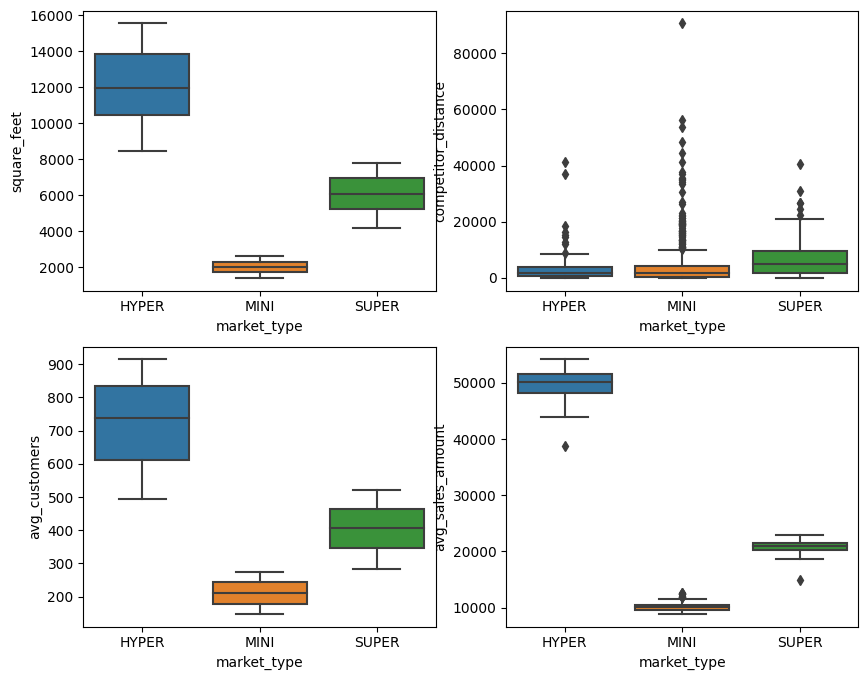

In [107]:
fig, axes = plt.subplots(nrows = 2, ncols= 2, figsize = (10,8))

sns.boxplot(x = 'market_type', y = merged_df['square_feet'],data = merged_df, ax =axes[0,0])
sns.boxplot(x = 'market_type', y = merged_df['competitor_distance'],data = merged_df, ax= axes[0,1])
sns.boxplot(x = 'market_type', y = merged_df['avg_customers'],data = merged_df, ax= axes[1,0])
sns.boxplot(x = 'market_type', y = merged_df['avg_sales_amount'],data = merged_df, ax =axes[1,1])



<Axes: xlabel='country', ylabel='avg_sales_amount'>

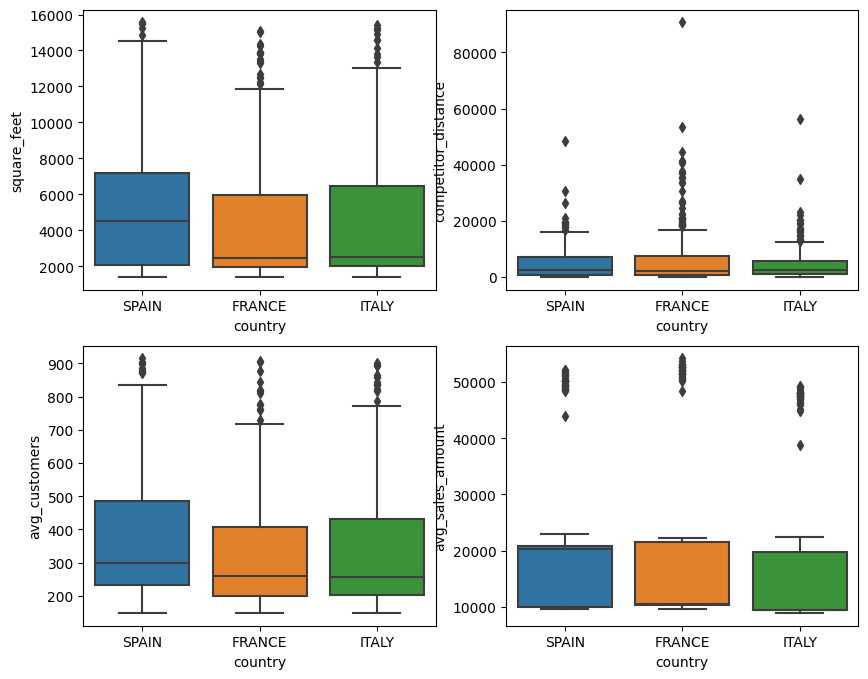

In [108]:
fig, axes = plt.subplots(nrows = 2, ncols= 2, figsize = (10,8))

sns.boxplot(x = 'country', y = merged_df['square_feet'],data = merged_df, ax =axes[0,0])
sns.boxplot(x = 'country', y = merged_df['competitor_distance'],data = merged_df, ax= axes[0,1])
sns.boxplot(x = 'country', y = merged_df['avg_customers'],data = merged_df, ax= axes[1,0])
sns.boxplot(x = 'country', y = merged_df['avg_sales_amount'],data = merged_df, ax =axes[1,1])


From boxplot's we immediatly see that is not usefull working nation by nation since they have a similar behaviour, eventhoug France is the one in which markets with highest revenue are concentrating, while Italy is the least.

Also is evident that competitor distance column is the one with a lot of outliers, even thoght this can be explained by the fact that there could be markets which are the only one in a village which is far away from the rest of the world.

The outlier of outliers is the one with competitor distance equal to 80.000 and this could be explained if this market was on an Island.

Other than that, we find a couple of outliers in column avg_sales_amount when dealing with Super_store and Hyper_store. I have decided to 'not manage' this outliers, since this could be a real case in which there are a SuperMarket and an HyperMarket that are just in a bad neighborhood.

<Axes: ylabel='avg_sales_amount'>

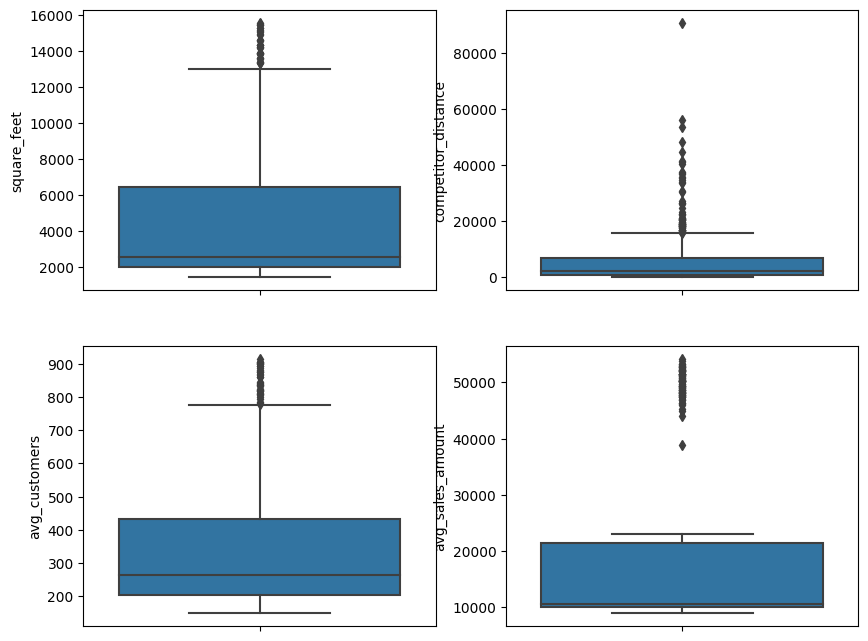

In [109]:
fig, axes = plt.subplots(nrows = 2, ncols= 2, figsize = (10,8))

sns.boxplot(y = merged_df['square_feet'],data = merged_df, ax =axes[0,0])
sns.boxplot(y = merged_df['competitor_distance'],data = merged_df, ax =axes[0,1])
sns.boxplot(y = merged_df['avg_customers'],data = merged_df, ax =axes[1,0])
sns.boxplot(y = merged_df['avg_sales_amount'],data = merged_df, ax =axes[1,1])

Now I plot some ScatterPlot in order to observe relationships between features

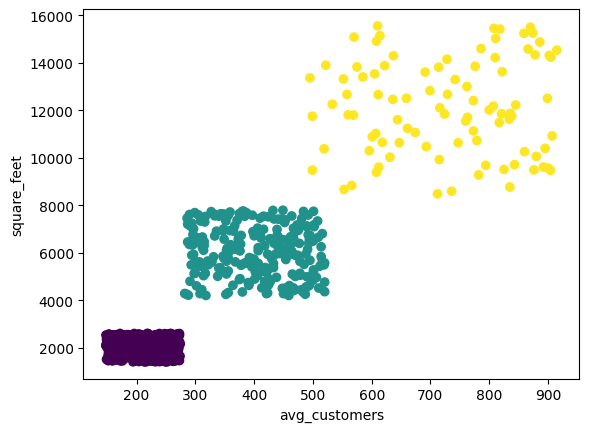

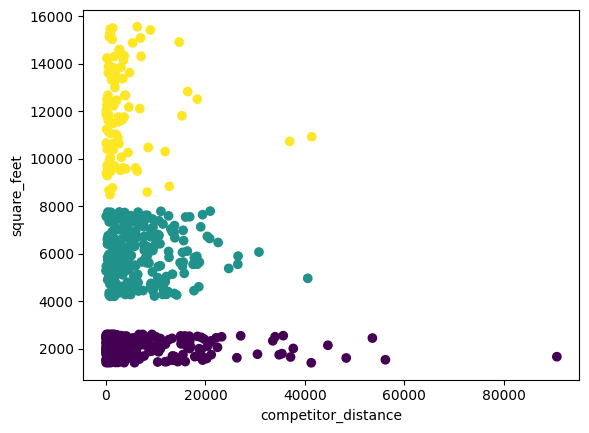

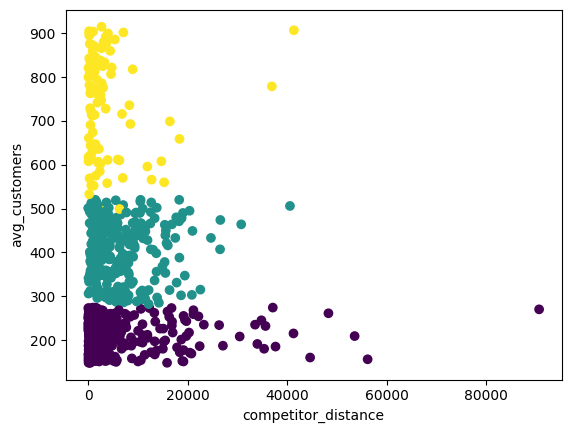

In [110]:
color = merged_df.loc[:, "market_type"].map(dict({"HYPER": 2, "SUPER": 1, "MINI": 0 })).tolist()

x1 = merged_df.loc[:, "avg_customers"]
y1 = merged_df.loc[:,"square_feet"]
plt.scatter(x1,y1, c = color)
plt.xlabel("avg_customers")
plt.ylabel("square_feet")
plt.show()

x2 = merged_df.loc[:, "competitor_distance"]
y2 = merged_df.loc[:,"square_feet"]
plt.scatter(x2,y2, c = color)
plt.xlabel("competitor_distance")
plt.ylabel("square_feet")
plt.show()

x3 = merged_df.loc[:, "competitor_distance"]
y3 = merged_df.loc[:,"avg_customers"]
plt.scatter(x3,y3, c = color)
plt.xlabel("competitor_distance")
plt.ylabel("avg_customers")
plt.show()

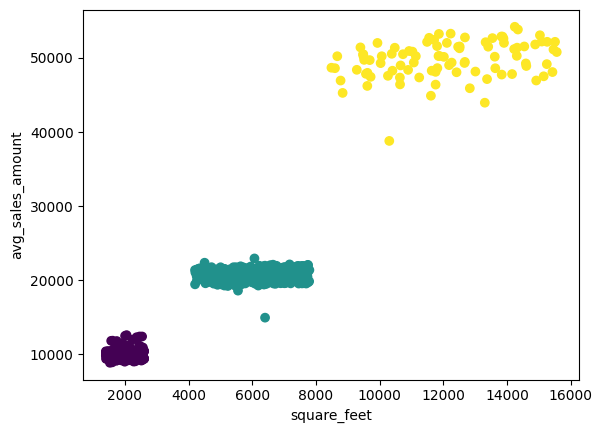

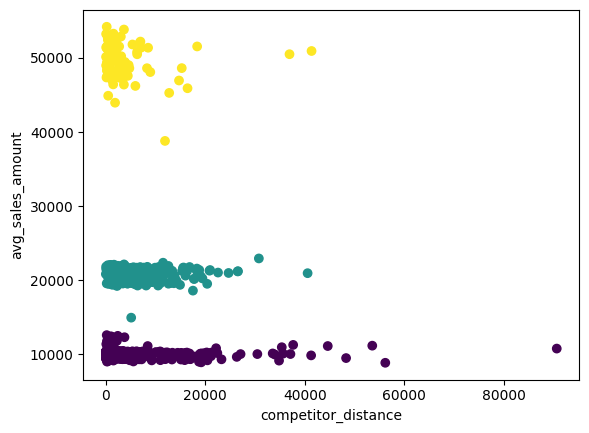

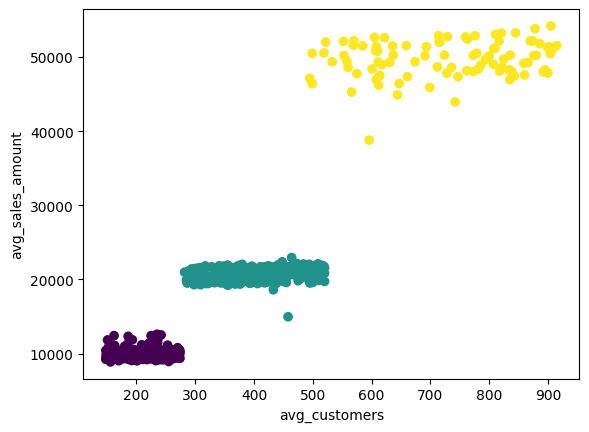

In [111]:
color = merged_df.loc[:, "market_type"].map(dict({"HYPER": 2, "SUPER": 1, "MINI": 0 })).tolist()

x1 = merged_df.loc[:, "square_feet"]
y1 = merged_df.loc[:,"avg_sales_amount"]
plt.scatter(x1,y1, c = color)
plt.xlabel("square_feet")
plt.ylabel("avg_sales_amount")
plt.show()

x2 = merged_df.loc[:, "competitor_distance"]
y2 = merged_df.loc[:,"avg_sales_amount"]
plt.scatter(x2,y2, c = color)
plt.xlabel("competitor_distance")
plt.ylabel("avg_sales_amount")
plt.show()

x3 = merged_df.loc[:, "avg_customers"]
y3 = merged_df.loc[:,"avg_sales_amount"]
plt.scatter(x3,y3, c = color)
plt.xlabel("avg_customers")
plt.ylabel("avg_sales_amount")
plt.show()

What can be seen is that data are well separated, this means that there is a real different between market type and if we want earn more money, without looking at expenses, we have to open a shop that is 'as big as possible'.
Therefore what data are suggesting is that there is no way to earn like a SuperStore if we have a MiniStore

Now, after having seen these plots I decide to not treat outliers, since I could be losing information which are only inside that datapoint

**Encoding and division of the dataset**

First of all, I decide to transorm the target variable avg_sales_open by dividing it with opening_percentage, I'm not taking also the logarithmic transformation, which is usually taken to avoid heteroshedicity, because as we will see, is not possible to reject the Null hypothesis in white's test, so data are homoschedicity.

I decided to divide the average sales amount of a shop with his opening percentage, in this way we are giving more importance to shops which have an high avg_sales_amount despite not being a 24/24 h shop.

In [112]:
sales_open = merged_df['avg_sales_amount'] / merged_df['opening_percentage']
merged_df['sales_open'] = sales_open

#encoding of country column

merged_df['spain'] = np.zeros(len(merged_df))
merged_df['italy'] = np.zeros(len(merged_df))

for i in range(len(merged_df)):
  if merged_df['country'].iloc[i] == 'SPAIN':
    merged_df['spain'].iloc[i] = 1

  if merged_df['country'].iloc[i] == 'ITALY':
    merged_df['italy'].iloc[i] = 1

merged_df = merged_df.drop('country', axis = 1)

#encoding of market_type column

for i in range(len(merged_df)):
  if merged_df['market_type'].iloc[i] == 'MINI':
    merged_df['market_type'].iloc[i] = 0
  if merged_df['market_type'].iloc[i] == 'SUPER':
    merged_df['market_type'].iloc[i] = 1
  if merged_df['market_type'].iloc[i] == 'HYPER':
    merged_df['market_type'].iloc[i] = 2

#encoding of has_promotion column

for i in range(len(merged_df)):
  if merged_df['has_promotions'].iloc[i] == 'NO':
    merged_df['has_promotions'].iloc[i] = 0
  if merged_df['has_promotions'].iloc[i] == 'YES':
    merged_df['has_promotions'].iloc[i] = 1

<ipython-input-112-3ec0435c2090>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['spain'].iloc[i] = 1
<ipython-input-112-3ec0435c2090>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['italy'].iloc[i] = 1
<ipython-input-112-3ec0435c2090>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['market_type'].iloc[i] = 2
<ipython-input-112-3ec0435c2090>:22: SettingWithCopyWarning: 
A value is trying to be set o

Here I'm splitting my dataset into 3 differt one's based on market type, also in the end I'm obviusly dropping the columns that I have merged, but moreover I'm dropping 'has_promotions', since it apperas only in mini store's and it appears different only 4 times in over 400 markets, therefore I'm not considering it.

In [113]:
hyper_store = merged_df[merged_df['market_type'] == 2]
super_store = merged_df[merged_df['market_type'] == 1]
mini_store = merged_df[merged_df['market_type'] == 0]

#I'm resetting indexes and dropping the new column which is created
hyper_store = hyper_store.reset_index()
super_store = super_store.reset_index()
mini_store = mini_store.reset_index()

hyper_store = hyper_store.drop('index', axis = 1)
super_store = super_store.drop('index', axis = 1)
mini_store = mini_store.drop('index', axis = 1)

#here I drop the column: 'market_type' and Id since are no more usefull
#merged_df = merged_df.drop(['id'], axis=1)
hyper_store = hyper_store.drop(['id','market_type','has_promotions','opening_percentage','avg_sales_amount'], axis=1)
super_store = super_store.drop(['id','market_type','has_promotions','opening_percentage','avg_sales_amount'], axis=1)
mini_store = mini_store.drop(['id','market_type', 'has_promotions','opening_percentage','avg_sales_amount'], axis=1)

mini_store

,square_feet,avg_customers,competitor_distance,sales_open,spain,italy
0,1402,252.0,522,12509.278174,0.0,0.0
1,1452,265.0,15939,12329.295281,0.0,0.0
2,2497,191.0,34007,12085.576352,0.0,0.0
3,1507,162.0,247,12414.898940,0.0,0.0
4,1582,217.0,20274,12288.968033,0.0,0.0
...,...,...,...,...,...,...
403,1910,165.0,81,12478.290331,0.0,0.0
404,1870,154.0,5777,11208.449139,0.0,1.0
405,1541,272.0,1161,12040.168654,1.0,0.0
406,2530,148.0,15859,11155.200778,0.0,1.0


In  the end we look at the correlation matrix and as we can see we have a really high correlation of avg_sales_amount and in general of sales_open with square_feet and avg_customers, so we can Imagine that these will be the variables that will drive the increase of sales.

Furthermore, we observe a low correlation of sales_open with Italy and Spain, which means that it is higher with Frace as we have supposed before in the bar plot.

<ipython-input-114-a6084e12dc51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


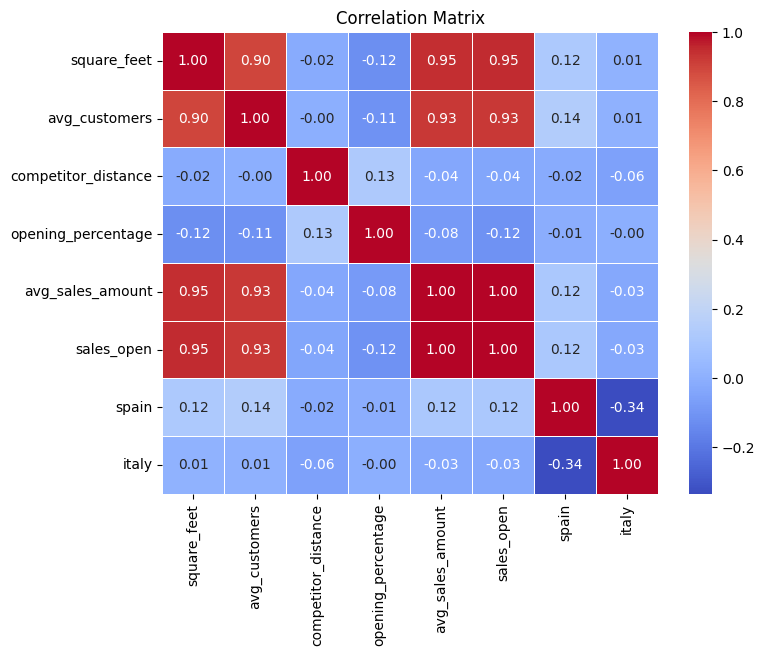

In [114]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **LINEAR REGRESSION**

In order of not having to write the code each time, I'm writing a funcion which performes both linear and multilinear regressions.
Other than that it has also the possibility of giving information about residuals, autocorrelation, performs the durbin-watson test and white's test ( which check for heteroschedicity ).

In [115]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

In [123]:
def linear_regression(X ,y, target_col, control = 0, q = 0):

  # split between X_train, X_test, y_train, y_test
  # i'm using to to say the function when it has to just fit all data
  if q == 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
  else:
    X_train_with_intercept = sm.add_constant(X)
    model = sm.OLS(y, X_train_with_intercept).fit()
    coefficients = model.params
    rows = []

    for index, value in coefficients.items():
        row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
        rows.append(row)

    summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
    print(summary_coeff)
    return

# Add a constant for the intercept to both, training and test data
  X_train_with_intercept = sm.add_constant(X_train)
  X_test_with_intercept = sm.add_constant(X_test)

# Fit the linear regression model
  model = sm.OLS(y_train, X_train_with_intercept).fit()

  y_pred = model.predict(X_test_with_intercept)
  # coefficient estimates
  coefficients = model.params

  if target_col == 0:

# let's create a dataframe with all coefficients and stats of interest
    rows = []
    for index, value in coefficients.items():
        row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
        rows.append(row)

    summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
    print(summary_coeff)

    # 1. correlation of error terms
    if control == 1:

      residuals_training = model.resid # notice that these are residuals from training data, not test data
      plt.plot(range(0, len(residuals_training)), residuals_training)
      plt.axhline(y=0, color="red", linestyle="--")
      plt.ylabel("Training residuals")


    # autocorrelation
      lagged_residuals = residuals_training.shift(1)  # Lagged residuals
      autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
      durbin_watson = sm.stats.durbin_watson(residuals_training)

      print(f"The autocorrelation is {round(autocorrelation, 5)} while the durbing watson statistic is {round(durbin_watson, 5)}")
      print('\n')
      #We perform white test to see if heteroshedicity is present
      print('White Test: ')
      white_test = het_white( residuals_training,  model.model.exog)
      labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
      #print results of White's test
      print(dict(zip(labels, white_test)))
      print('\n')

    #We check collinearity
      vif = pd.DataFrame()
      vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
      vif["Feature"] = X_train.columns
      print(vif)


  else:
     beta_0_estim = coefficients['const']
     beta_1_estim = coefficients[target_col]

     std_err_beta_0_estim = model.bse['const']
     std_err_beta_1_estim = model.bse[target_col]
     t_stat_beta_0_estim = model.tvalues['const']
     t_stat_beta_1_estim = model.tvalues[target_col]
     p_value_beta_0_estim = model.pvalues['const']
     p_value_beta_1_estim = model.pvalues[target_col]

     summary_coeff = pd.DataFrame([
         ["beta_0 estimated", beta_0_estim, std_err_beta_0_estim, t_stat_beta_0_estim, p_value_beta_0_estim],
         ["beta_1 estimated", beta_1_estim, std_err_beta_1_estim, t_stat_beta_1_estim, p_value_beta_1_estim],
         ], columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
     print(summary_coeff)


  # R2
  R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# MSE
  MSE = ((y_test - y_pred) ** 2).mean()

  print('R2: ',+ R2);
  print('MSE: ',+MSE)


  if (control == 1) or (target_col != 0):
    return
  else:
    return coefficients

# **Ministore linear regression**

Here I'm performing a linear regression with respect to all the columns for all kind of markets.

Also from this point on, X3 will be mini_store without the taget variable, X2 super_store ... and X1 hyper_store ... while y_i will be the taget variable for X_i

In [118]:
X3 = mini_store.drop(['sales_open'],axis = 1)
col = X3.columns
for i in col:
  print('\n')
  print(i)
  linear_regression(X3[i], mini_store['sales_open'], i)




square_feet
                     OLS estimation          SE    t-stats        p-value
0  beta_0 estimated    12133.511641  159.943502  75.861235  2.434894e-208
1  beta_1 estimated       -0.045555    0.078774  -0.578303   5.634615e-01
R2:  -0.015164797665745189
MSE:  238744.90719212696


avg_customers
                     OLS estimation          SE    t-stats        p-value
0  beta_0 estimated    11750.810732  157.435347  74.638961  3.537932e-206
1  beta_1 estimated        1.381686    0.734301   1.881635   6.078194e-02
R2:  -0.005030621619852793
MSE:  236361.5671422074


competitor_distance
                     OLS estimation         SE     t-stats   p-value
0  beta_0 estimated    12098.853184  31.253484  387.120141  0.000000
1  beta_1 estimated       -0.011436   0.003092   -3.698215  0.000255
R2:  -0.023146703427588955
MSE:  240622.07960266512


spain
                     OLS estimation         SE     t-stats   p-value
0  beta_0 estimated    12076.471603  30.831013  391.698829  0.000

# **SuperStore linear regression**

In [119]:
X2 = super_store.drop(['sales_open'],axis = 1)
col = X2.columns
for i in col:
  print('\n')
  print(i)
  linear_regression(X2[i], super_store['sales_open'], i)



square_feet
                     OLS estimation          SE    t-stats        p-value
0  beta_0 estimated    24343.126455  406.312377  59.912343  7.545150e-129
1  beta_1 estimated        0.143105    0.066100   2.164979   3.158546e-02
R2:  -0.012866299040269036
MSE:  911594.9585542767


avg_customers
                     OLS estimation          SE    t-stats        p-value
0  beta_0 estimated    24142.204125  404.646148  59.662508  1.652846e-128
1  beta_1 estimated        2.660870    0.993690   2.677766   8.033760e-03
R2:  -0.030245487103067514
MSE:  927236.4901530924


competitor_distance
                     OLS estimation         SE     t-stats        p-value
0  beta_0 estimated    25316.124587  102.25692  247.573706  1.075088e-248
1  beta_1 estimated       -0.016287    0.01137   -1.432417   1.536013e-01
R2:  -0.03645364721203537
MSE:  932823.9279645738


spain
                     OLS estimation          SE     t-stats        p-value
0  beta_0 estimated    25334.462525   80.881857

# **HyperStore linear regression**

In [120]:
X1 = hyper_store.drop(['sales_open'],axis = 1)
col = X1.columns
for i in col:
  print('\n')
  print(i)
  linear_regression(X1[i], hyper_store['sales_open'], i)



square_feet
                     OLS estimation           SE    t-stats       p-value
0  beta_0 estimated    55265.231867  1637.674231  33.746169  1.865665e-45
1  beta_1 estimated        0.405226     0.134628   3.009976  3.615330e-03
R2:  0.017083388092649532
MSE:  6296122.020623605


avg_customers
                     OLS estimation           SE    t-stats       p-value
0  beta_0 estimated    59459.877205  1733.904038  34.292484  6.366208e-46
1  beta_1 estimated        0.922985     2.371176   0.389252  6.982548e-01
R2:  -0.05395493335226287
MSE:  6751161.577936133


competitor_distance
                     OLS estimation          SE     t-stats       p-value
0  beta_0 estimated    60370.552066  341.051496  177.013011  1.126334e-95
1  beta_1 estimated       -0.068497    0.051433   -1.331756  1.871999e-01
R2:  -0.14432228541515202
MSE:  7330014.21749477


spain
                     OLS estimation          SE     t-stats       p-value
0  beta_0 estimated    59933.647193  352.485471  17

As we can see the linear regression do not give us any usefull informations other than that Italy is a negative contribute to sales for all type of markets

# **MULTIVARIATE LINEAR REGRESSION**

Here I perform the multilinear regressions for my type of markets

MiniStore
                        OLS estimation         SE     t-stats        p-value
0                const    12110.495144  13.136571  921.891687   0.000000e+00
1          square_feet        0.077668   0.004350   17.853305   5.898084e-50
2        avg_customers        1.279245   0.040551   31.546583  3.127045e-100
3  competitor_distance       -0.012241   0.000172  -71.217272  2.555834e-198
4                spain     -567.296491   3.995626 -141.979393  4.676410e-291
5                italy    -1133.353764   3.559658 -318.388397   0.000000e+00
The autocorrelation is 0.00086 while the durbing watson statistic is 2.05751


White Test: 
{'Test Statistic': 12.562327019407734, 'Test Statistic p-value': 0.7649567885845759, 'F-Statistic': 0.72614055933616, 'F-Test p-value': 0.7756059275347236}


   VIF Factor              Feature
0   15.236357          square_feet
1   14.992048        avg_customers
2    1.303834  competitor_distance
3    1.375567                spain
4    1.554288             

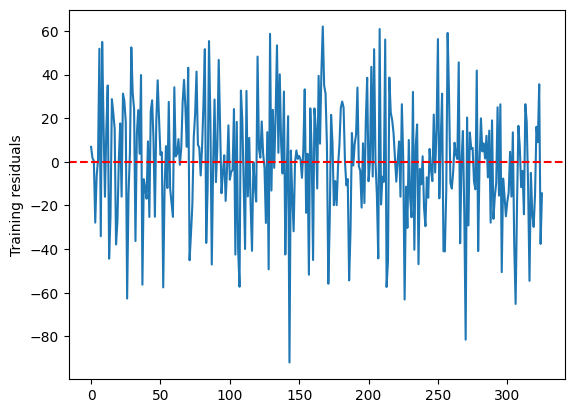

In [124]:
print('MiniStore')
linear_regression(X3, mini_store['sales_open'],0, control = 1)


SuperStore
                        OLS estimation         SE     t-stats        p-value
0                const    24285.869878  35.720041  679.894802   0.000000e+00
1          square_feet        0.147754   0.003927   37.624750   4.462928e-91
2        avg_customers        2.645457   0.059420   44.520971  8.692261e-104
3  competitor_distance       -0.026098   0.000672  -38.862612   1.738493e-93
4                spain    -1181.519577   9.866613 -119.749253  8.435536e-184
5                italy    -2359.473543  10.423354 -226.364147  4.821530e-237
The autocorrelation is 0.00581 while the durbing watson statistic is 2.14419


White Test: 
{'Test Statistic': 14.482920147177092, 'Test Statistic p-value': 0.6326718339355261, 'F-Statistic': 0.8357852513942539, 'F-Test p-value': 0.6502924856246295}


   VIF Factor              Feature
0   16.370492          square_feet
1   17.007287        avg_customers
2    2.111476  competitor_distance
3    1.514538                spain
4    1.448706          

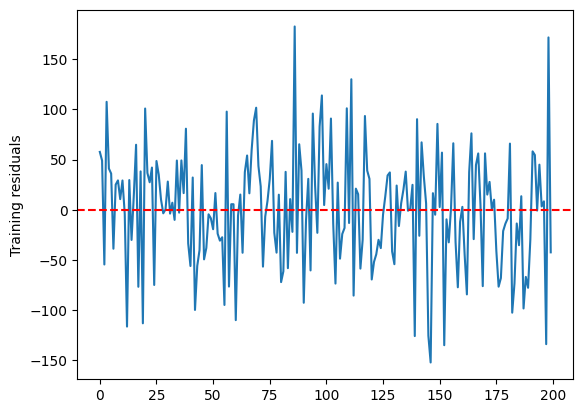

In [125]:
print('SuperStore')
linear_regression(X2, super_store['sales_open'],0 , control = 1)
print('\n')

HyperStore
                        OLS estimation          SE     t-stats        p-value
0                const    54499.472418  157.328333  346.405962  1.001304e-110
1          square_feet        0.363312    0.009049   40.148569   1.351988e-48
2        avg_customers        6.070394    0.161964   37.479888   1.117491e-46
3  competitor_distance       -0.062676    0.003325  -18.850228   1.728786e-28
4                spain    -2776.423837   48.742305  -56.961275   1.753419e-58
5                italy    -5754.135671   46.908211 -122.667984   1.419372e-80
The autocorrelation is 0.00861 while the durbing watson statistic is 1.81217


White Test: 
{'Test Statistic': 7.591783442180061, 'Test Statistic p-value': 0.974514679388105, 'F-Statistic': 0.3755132551462147, 'F-Test p-value': 0.9855896314596347}


   VIF Factor              Feature
0   18.464746          square_feet
1   22.377825        avg_customers
2    1.419799  competitor_distance
3    2.309279                spain
4    2.233502     

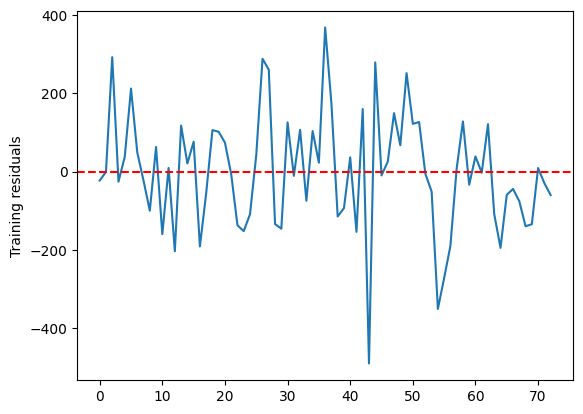

In [126]:
print('HyperStore')
linear_regression(X1, hyper_store['sales_open'],0 , control = 1)

As we can see in all our type of markets there is no correlation between variables and variances, also we have a really high Mean Square Error, as we could have expected, togheter with a really high R2 ( 0.99 for all three), which is the most important fact and tells us that linear regression is doing a 'good work'.

By looking at coefficients we already a first suggestions that mainly an increase in dimension ( square feet ) of our stores and an increase of the number of average daily customers will lead to an increase of sales.

Furthermore, as anticipated whites test is telling us that is not possible to reject the null hyphotesis, which is a good thing, we do not have heteroschedicity in our data.

Last but not least, we can see that there collinearity with square_feet and avg_customers in very high

We now perform a feature selection to see if this is the best linear model that we could choose or maybe if working with less variable will give us better results

# **FEATURE SELECTION**

# **K-Fold OLS**

In [127]:
import itertools
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

As before, I create a function to not have to write three times the code

In [128]:
def best_subset_selection(X, y, n):

    number_folds = 5
    kf = KFold(n_splits = number_folds, shuffle=True, random_state=999)

    n_features = n#X.shape[1]
    all_models = []
    best_models = []
    metrics = {"R2": -float("inf"),"MSE": float("inf")}

    # for each number of features
    for k in range(1, n_features + 1):

        # for each combination of k number of features

        for combo in itertools.combinations(X.columns, k):

            model_features = list(combo)  #takes a number of features and tests it
            X_subset = X[model_features]

            # Add a constant for the intercept term
            X_subset = sm.add_constant(X_subset)
            # initialize empty array to store mse for each fold
            mse_folds = []


            # for each fold fit the model
            for train_idx, validation_idx in kf.split(X_subset):

                X_train, X_validation = X_subset.iloc[train_idx], X_subset.iloc[validation_idx]
                y_train = y[train_idx]
                y_validation = y[validation_idx]

                X_train_with_intercept = sm.add_constant(X_train)
                X_test_with_intercept = sm.add_constant(X_validation)


                model = sm.OLS(y_train, X_train_with_intercept).fit()
                y_pred = model.predict(X_test_with_intercept)


                R2 = r2_score(y_validation, y_pred)
                MSE = mean_squared_error(y_validation, y_pred)

                mse_folds.append(MSE)

            # estimate test error using the mean of MSE in all folds
            test_error_estimated = np.sum(mse_folds)/ len(mse_folds)

            # if the estimation of the test error is reduced, save metrics and model
            if test_error_estimated < metrics["MSE"]:

                metrics["R2"] = R2
                metrics["MSE"] = test_error_estimated
                best_models = model_features
            # save number of features and estimated test error for plotting
            all_models.append([len(list(combo)), test_error_estimated])
    return best_models, metrics, all_models

We now apply it and observe what happens

Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
R2: 0.9959114049691979
MSE: 24003.991451686597


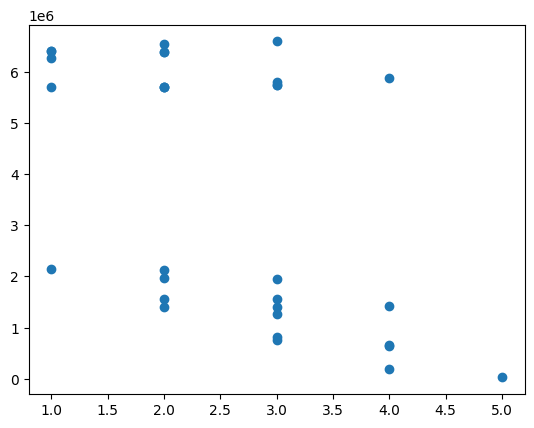

In [129]:
y1 =  hyper_store["sales_open"]

best_features, best_metrics, all_models = best_subset_selection(X1 , y1, X1.shape[1])

print("Features with best model:", best_features)
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])
hyper_best_combo = [best_features, best_metrics]

fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])


Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
R2: 0.996390346389854
MSE: 3507.5289971652264


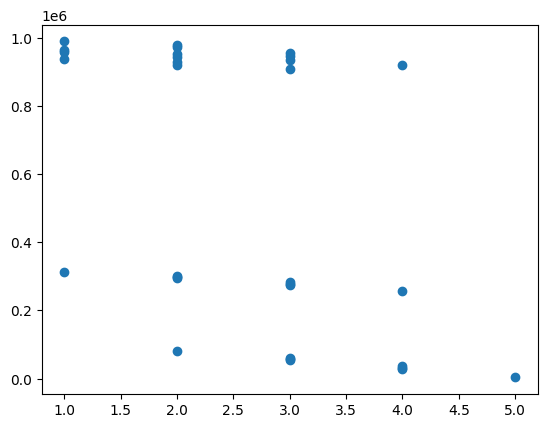

In [130]:
y2 =  super_store["sales_open"]

best_features, best_metrics, all_models = best_subset_selection(X2 , y2, X2.shape[1])

print("Features with best model:", best_features)
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])
super_best_combo = [best_features, best_metrics]

fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
R2: 0.9971405453263463
MSE: 862.570948586618


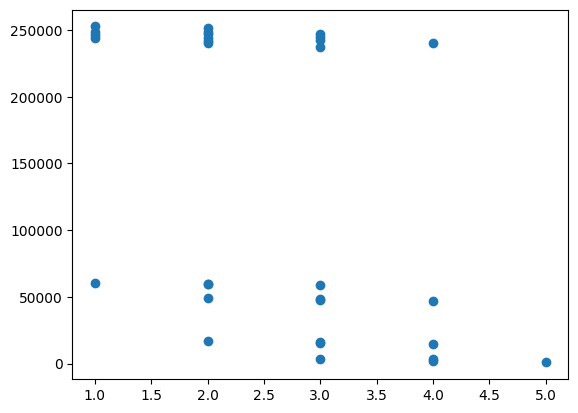

In [131]:
y3 =  mini_store["sales_open"]

best_features, best_metrics, all_models = best_subset_selection(X3 , y3, X3.shape[1])

print("Features with best model:", best_features)
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])
mini_best_combo = [best_features, best_metrics]

fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

In [132]:
print('HyperStore')
print(hyper_best_combo[0])
print(hyper_best_combo[1])

print('SuperStore')
print(super_best_combo[0])
print(super_best_combo[1])

print('MiniStore')
print(mini_best_combo[0])
print(mini_best_combo[1])

HyperStore
['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
{'R2': 0.9959114049691979, 'MSE': 24003.991451686597}
SuperStore
['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
{'R2': 0.996390346389854, 'MSE': 3507.5289971652264}
MiniStore
['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
{'R2': 0.9971405453263463, 'MSE': 862.570948586618}


As we can see mini_store dataset is the one which performs best wrt MSE, but as before, when we were taking the multilinear feature selection, R2 is really high, which is good since we are looking at the results of a 5-fold test.

Therefore to aswer to first question we look at the model with all data fitted using the best model, which is the one with all the features.

In [133]:
print('HyperStore')
linear_regression(X1, hyper_store['sales_open'],0 , control = 0, q = 1)

HyperStore
                        OLS estimation          SE     t-stats        p-value
0                const    54525.782582  129.183079  422.081460  2.108006e-144
1          square_feet        0.363812    0.007759   46.889235   4.967763e-63
2        avg_customers        6.043879    0.129541   46.656259   7.503117e-63
3  competitor_distance       -0.062163    0.002408  -25.812049   2.875540e-42
4                spain    -2789.534081   38.811983  -71.873010   1.403989e-78
5                italy    -5760.811403   38.589118 -149.285906  1.202644e-105


Before answering to the first question, we have to observe that our target value is expressed as:

avg_sales_amount / opening_percentage

therefore, to have the 'real' value, we have to multiply by the opening_percentage.

 As regard hyper_store, the **median** value from which an hyper store starts is **54525**, more or less, multiplied by it's opening percentage. So if we are not increasing / decreasing any variable that will be our "starting point".

Now, every time we increase a unit of **square_feet** we get an increase of **0.36** sales_open, while with an increase of 1 unit of **avg_customers** we get an increase of **6.04** unit of sales, last but not least, an increase of 1 unit in **competitor_distance** we get a **decrease of 0.06** over sales, this is probably done by the fact that we are getting further from city, therefore there are 'less money'.

In [134]:
print('SuperStore')
linear_regression(X2, super_store['sales_open'],0 , control = 0, q = 1)

SuperStore
                        OLS estimation         SE     t-stats        p-value
0                const    24312.448364  32.287182  753.006195   0.000000e+00
1          square_feet        0.146449   0.003562   41.111869  1.110729e-111
2        avg_customers        2.615723   0.053690   48.719434  1.015231e-127
3  competitor_distance       -0.026287   0.000597  -44.034236  4.265604e-118
4                spain    -1186.849952   8.898121 -133.382092  5.330425e-230
5                italy    -2368.623769   9.340093 -253.597448  1.439403e-297


As regard super_store, the **median** value from which an hyper store starts is **24312**, more or less, multiplied by it's opening percentage. So if we are not increasing / decreasing any variable that will be our "starting point".

Now, every time we increase a unit of **square_feet** we get an increase of **0.14** sales_open, while with an increase of 1 unit of **avg_customers** we get an increase of **2.61** unit of sales, last but not least, an increase of 1 unit in **competitor_distance** we get a **decrease of 0.02** over sales, this is probably done by the fact that we are getting further from city, therefore there are 'less money'.

In [ ]:
print('MiniStore')
linear_regression(X3, mini_store['sales_open'],0 , control = 0, q = 1)

MiniStore
                        OLS estimation         SE     t-stats        p-value
0                const    12110.031422  12.352665  980.357804   0.000000e+00
1          square_feet        0.077960   0.004143   18.817517   4.151499e-57
2        avg_customers        1.277539   0.038868   32.868395  5.718485e-116
3  competitor_distance       -0.012175   0.000154  -79.312287  1.317984e-247
4                spain     -565.779193   3.843264 -147.213197   0.000000e+00
5                italy    -1133.234595   3.400484 -333.256855   0.000000e+00


As regard hyper_store, the **median** value from which an hyper store starts is **12110**, more or less, multiplied by it's opening percentage. So if we are not increasing / decreasing any variable that will be our "starting point".

Now, every time we increase a unit of **square_feet** we get an increase of **0.07** sales_open, while with an increase of 1 unit of **avg_customers** we get an increase of **1.27** unit of sales, last but not least, an increase of 1 unit in **competitor_distance** we get a **decrease of 0.01** over sales, this is probably done by the fact that we are getting further from city, therefore there are 'less money'.

Also by looking at data is not suggested to open any store in Italy or Spain, but this is probably given by the fact that data are kinda biased by France, which as the highest average revenue for all kind of markets, other than the highest numeber of shops of all type of markets.

In the end I would like to add that I've chosen not to implement ridge, lasso and PCA since I find that they would not have been usefull for our task, since lasso and ridge are shrinkage methods which would help us to decrease the MSE error at the price of interpretability, but we are looking for a model which is easy to interpret and we have found it, moreover it has an optimal test R2.

In the same way I didn't thought pca would have been usefull.

In [137]:
mini_store.to_csv('mini_store', index = False)
super_store.to_csv('super_store', index = False)
hyper_store.to_csv('hyper_store', index = False)

# ***OBJECTIVE 2: which shop of each category should the company open?***

# **Data Preprocessing**

First of all I'm uploading my datasets, which I have left already splitted.

In [135]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

In [138]:
mini_store = pd.read_csv('mini_store')
super_store = pd.read_csv('super_store')
hyper_store = pd.read_csv('hyper_store')

X3 = mini_store.drop(['sales_open'],axis = 1)
X2 = super_store.drop(['sales_open'],axis = 1)
X1 = hyper_store.drop(['sales_open'],axis = 1)

y1 = hyper_store['sales_open']
y2 = super_store['sales_open']
y3 = mini_store['sales_open']

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X1)
#X1 = pd.DataFrame(X_scaled, columns=X1.columns)

#X_scaled = scaler.fit_transform(X2)
#X2 = pd.DataFrame(X_scaled, columns=X2.columns)

#X_scaled = scaler.fit_transform(X3)
#X3 = pd.DataFrame(X_scaled, columns=X3.columns)

Now, to choose which model use to give my advice to the company, I decide to test various different models.

To choose which model I'm going to utilize, I will look at the Mean Square Error and I will utilize the one with the lowest MSE.

First of all I create a dataframe to store my results

In [139]:
models_mse = pd.DataFrame()

# **Linear Regression**

In [140]:
def linear_regression(X ,y):

  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=99)
  mse_folds = []

  for train_idx, val_idx in kf.split(X):

      X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
      y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

      X_train_with_intercept = sm.add_constant(X_train)
      X_test_with_intercept = sm.add_constant(X_val)

# Fit the linear regression model
      model = sm.OLS(y_train, X_train_with_intercept).fit()

      y_pred = model.predict(X_test_with_intercept)

# MSE
      mse = ((y_val - y_pred) ** 2).mean()
      mse_folds.append(mse)

  test_error_estimated = np.sum(mse_folds)/ len(mse_folds)

  return   test_error_estimated



Here I create a dictionary to store data about the lowest mse that I get

In [141]:
regression_mse ={'Type':'Multilinear Regression','Hyper':0, 'Super':0, 'Mini':0 }

regression_mse['Hyper'] = linear_regression(X1,y1)
regression_mse['Super'] = linear_regression(X2,y2)
regression_mse['Mini'] = linear_regression(X3,y3)
models_mse = models_mse.append(regression_mse, ignore_index=True)

regression_mse

<ipython-input-141-60829cddfed2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(regression_mse, ignore_index=True)


{'Type': 'Multilinear Regression',
 'Hyper': 23158.02318772937,
 'Super': 3519.0273015734047,
 'Mini': 877.5694945341671}

# **Polynomial regression**

In [142]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [143]:
def Poly_reg(X, y):
# Number of splits for k-fold cross-validation
  k = 5

# Split the data into k folds manually
  kf = KFold(n_splits=k, shuffle=True, random_state=99)

# Initialize an array to store MSE values for each fold
  mse_folds = []

# run k-fold cv
  for train_idx, validation_idx in kf.split(X):
      X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # polynomial degree 2
      poly = PolynomialFeatures(2)
      X_train_poly = poly.fit_transform(X_train) # print the columns of X_train_poly: how many columns do you expect? check the documentation to understand why there are so many columns!
      X_validation_poly = poly.fit_transform(X_validation)

    # fit model
      model = LinearRegression()
      model.fit(X_train_poly, y_train)

    # get predictions
      y_pred = model.predict(X_validation_poly)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


# Calculate the mean MSE across folds
  estimated_test_error = sum(mse_folds) / len(mse_folds)

  return estimated_test_error

In [144]:
poly_mse ={'Type':'Polynomial regression','Hyper':0, 'Super':0, 'Mini':0 }

poly_mse['Hyper'] = Poly_reg(X1, y1)
poly_mse['Super'] = Poly_reg(X2, y2)
poly_mse['Mini'] = Poly_reg(X3, y3)
models_mse = models_mse.append(poly_mse, ignore_index=True)

poly_mse

<ipython-input-144-7a63afac48ca>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(poly_mse, ignore_index=True)


{'Type': 'Polynomial regression',
 'Hyper': 32924.145500819446,
 'Super': 3678.417257753195,
 'Mini': 873.3735517037769}

# **Generalized Additive Model - GAM**

In [ ]:
!pip install pygam

In [146]:
from pygam import LinearGAM, s
from functools import reduce

In [147]:
def GAM(X, y):
# initialize MSE and lambda
  best_lmbd_gam = {"MSE": float("inf"), "lmbd": float("inf")}

# test different values of lambda (control smoothness)
  for lmbd in np.linspace(0, 10, 10):

    # Initialize an array to store MSE values for each fold
      mse_folds = []

      k = 5
      kf = KFold(n_splits=k, shuffle=True, random_state=99)

    # run k-fold cv
      for train_idx, validation_idx in kf.split(X):
          X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit GAM: for each predictor add a smoothing spline (i.e. s(i)) and use lambda to control smoothness
          s_terms = [s(i, lam=lmbd) for i in range(len(X_train.columns))]
          gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
          gam.fit(X_train, y_train)

        # get predictions
          y_pred = gam.predict(X_validation)
          current_mse = ((y_validation - y_pred)**2).mean()
          mse_folds.append(current_mse)

    # Calculate the mean MSE across folds
      estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
      if estimated_test_error < best_lmbd_gam["MSE"]:
          best_lmbd_gam["MSE"] = estimated_test_error
          best_lmbd_gam["lmbd"] = lmbd

  #print(f"The lowest estimated test error MSE is {best_lmbd_gam['MSE']}, obtained when lambda = {best_lmbd_gam['lmbd']}")

  return  estimated_test_error

In [148]:
gam_mse ={'Type':'General Additive Model','Hyper':0, 'Super':0, 'Mini':0 }

gam_mse['Hyper'] = GAM(X1, y1)
gam_mse['Super'] = GAM(X2, y2)
gam_mse['Mini'] = GAM(X3, y3)
models_mse = models_mse.append(gam_mse, ignore_index=True)

gam_mse

<ipython-input-148-5bf83f9bff1a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(gam_mse, ignore_index=True)


{'Type': 'General Additive Model',
 'Hyper': 3626497.2381375553,
 'Super': 3833.662639737084,
 'Mini': 947.0100711947373}

# **Pruning Decision Tree**

In [149]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
def Pruning_Tree(X, y):
# initialize MSE and alpha
  best_alpha = {"MSE": float("inf"), "alpha": float("inf")}

# fit a decision tree with all data to derive the alpha values (for tree pruning)
  tree = DecisionTreeRegressor(random_state=99)
  tree.fit(X, y)

# get alpha values
  alphas = []
  for node in tree.cost_complexity_pruning_path(X, y).impurities:
      alphas.append(max(0, node))

# test different values of alpha (control tree complexity)
  for alpha in alphas:

    # Initialize an array to store MSE values for each fold
      k = 5
      kf = KFold(n_splits=k, shuffle=True, random_state=99)
      mse_folds = []

    # run k-fold cv
      for train_idx, validation_idx in kf.split(X):
          X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit pruned tree
          pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=99)
          pruned_tree.fit(X_train, y_train)

        # get predictions
          y_pred = pruned_tree.predict(X_validation)
          current_mse = ((y_validation - y_pred)**2).mean()
          mse_folds.append(current_mse)

    # Calculate the mean MSE across folds
      estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
      if estimated_test_error < best_alpha["MSE"]:
          best_alpha["MSE"] = estimated_test_error
          best_alpha["alpha"] = alpha

  #print(f"The lowest estimated test error MSE is {best_alpha['MSE']}, obtained when alpha = {best_alpha['alpha']}")

# Train the final decision tree with the best alpha value and evaluate it on the test data
  #final_tree = DecisionTreeRegressor(ccp_alpha=best_alpha['alpha'], random_state=99)
  #final_tree.fit(X, y)

  return  estimated_test_error

In [151]:
DecTree_mse ={'Type':'pruning decision trees','Hyper':0, 'Super':0, 'Mini':0 }

DecTree_mse['Hyper'] = Pruning_Tree(X1,y1)
DecTree_mse['Super'] = Pruning_Tree(X2,y2)
DecTree_mse['Mini'] = Pruning_Tree(X3,y3)
models_mse = models_mse.append(DecTree_mse, ignore_index=True)

DecTree_mse

<ipython-input-151-10a0d1e42559>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(DecTree_mse, ignore_index=True)


{'Type': 'pruning decision trees',
 'Hyper': 6405075.790250687,
 'Super': 991058.4644332271,
 'Mini': 249694.7549152829}

# **Random Forest**

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
def rand_for(X, y):
# Initialize an array to store MSE values for each fold
  mse_folds = []
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=99)

# run k-fold cv
  for train_idx, validation_idx in kf.split(X):
      X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest
      model = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=99)

    # fit the model to the training data
      model.fit(X_train, y_train)

    # make predictions
      y_pred = model.predict(X_validation)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


# Calculate the mean MSE across folds
  estimated_test_error = sum(mse_folds) / len(mse_folds)
  #print(f"The estimated test MSE error is {estimated_test_error}")
  return estimated_test_error

In [154]:
random_forest_mse ={'Type':'random forest','Hyper':0, 'Super':0, 'Mini':0 }

random_forest_mse['Hyper'] = rand_for(X1,y1)
random_forest_mse['Super'] = rand_for(X2,y2)
random_forest_mse['Mini'] = rand_for(X3,y3)
models_mse = models_mse.append(random_forest_mse, ignore_index=True)

random_forest_mse

<ipython-input-154-c164fc73ebc4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(random_forest_mse, ignore_index=True)


{'Type': 'random forest',
 'Hyper': 638756.2879411274,
 'Super': 24751.997893509346,
 'Mini': 5189.4758465628}

# **Gradient Boosting**

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

In [156]:
def grad_boost(X, y):

# Initialize an array to store MSE values for each fold
  mse_folds = []
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=99)

# run k-fold cv
  for train_idx, validation_idx in kf.split(X):
      X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest
      model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=99)

    # fit the model to the training data
      model.fit(X_train, y_train)

    # make predictions
      y_pred = model.predict(X_validation)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


# Calculate the mean MSE across folds
  estimated_test_error = sum(mse_folds) / len(mse_folds)
  #print(f"The estimated test MSE error is {estimated_test_error}")
  return  estimated_test_error

In [157]:
gradient_boosting_mse ={'Type':'gradient boosting','Hyper':0, 'Super':0, 'Mini':0 }

gradient_boosting_mse['Hyper'] = grad_boost(X1,y1)
gradient_boosting_mse['Super'] = grad_boost(X2,y2)
gradient_boosting_mse['Mini'] = grad_boost(X3,y3)
models_mse = models_mse.append(gradient_boosting_mse, ignore_index=True)

gradient_boosting_mse

<ipython-input-157-d97e9c9c4b40>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(gradient_boosting_mse, ignore_index=True)


{'Type': 'gradient boosting',
 'Hyper': 234746.99365434673,
 'Super': 9720.483277496784,
 'Mini': 2456.036650481988}

# **Support Vector Machines**

I'm not using linear or polynomials kernels since them requires over an hour and I'm not archieving a better result than the ones from linear and polynomial regression, therefore I'm leaving here just the kernel 'rbf', even thought the other perform better, but not enough to beat linear or polynomial.

In [158]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [163]:
def SupVecMac(X, y, train, data = 0, idx = 0):
# find best parameters
  parameters = {
      'C': np.linspace(1, 100, 10).tolist(),
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'] + np.linspace(0.01, 1, 10).tolist(),
  }

# Create the SVM model
  svm = SVR()

# Create the GridSearchCV
  grid_search = GridSearchCV(svm, parameters, cv=5)

# Fit the GridSearchCV to the training data
  grid_search.fit(X, y)

# Get the best parameters and the best score
  best_params = grid_search.best_params_

  # Now we can run k-fold using the best parameters

  if train == 0:
# Initialize an array to store MSE values for each fold
    mse_folds = []

    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=99)

# run k-fold cv
    for train_idx, validation_idx in kf.split(X):

        X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # fit model
        model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"])
        model.fit(X_train, y_train)

    # get predictions
        y_pred = model.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)

# Calculate the mean MSE across folds
    estimated_test_error = np.sum(mse_folds) / len(mse_folds)
    #print('estimated error: ',+ estimated_test_error)

    return  estimated_test_error    # best_idx

  #else :

  # model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"])
  # model.fit(X.iloc[idx], y.iloc[idx])

  # y_pred = model.predict(data)
  # print(y_pred)

  # return

In [164]:
SVM_mse ={'Type':'support vector machines', 'Hyper':0, 'Super':0, 'Mini':0 }

SVM_mse['Hyper'] = SupVecMac(X1,y1, train = 0)
SVM_mse['Super'] = SupVecMac(X2,y2, train = 0)
SVM_mse['Mini'] = SupVecMac(X3,y3, train = 0)
models_mse = models_mse.append(SVM_mse, ignore_index=True)

SVM_mse

<ipython-input-164-5d28cd5a6294>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(SVM_mse, ignore_index=True)


{'Type': 'support vector machines',
 'Hyper': 6173268.95451702,
 'Super': 1088496.100378065,
 'Mini': 279312.40113199153}

# **Neural Networks**

In [165]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [166]:
def NeuralNetwork(X, y, evaluate = 0, data = 0):

  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=99)
  mse_folds = []

  if evaluate == 0:

    for train_idx, val_idx in kf.split(X):

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        regr = MLPRegressor(random_state = 999, max_iter=1000, solver = 'sgd', activation = 'logistic', batch_size = 5).fit(X_train, y_train)
        y_pred = regr.predict(X_val)

        # MSE
        mse = ((y_val - y_pred) ** 2).mean()
        mse_folds.append(mse)

    estimated_test_error = np.sum(mse_folds) / len(mse_folds)



    return  estimated_test_error
  else:
    regr = MLPRegressor(random_state = 999, max_iter=1000, solver = 'sgd', activation = 'logistic', batch_size = 5).fit(X, y)
    y_pred = regr.predict(data)
    print(y_pred)
    return

In [167]:
NN_mse ={'Type':'Neural Networks', 'Hyper':0, 'Super':0, 'Mini':0 }

NN_mse['Hyper'] = NeuralNetwork(X1, y1)
NN_mse['Super'] = NeuralNetwork(X2, y2)
NN_mse['Mini'] = NeuralNetwork(X3, y3)
models_mse = models_mse.append(NN_mse, ignore_index=True)

NN_mse

<ipython-input-167-4e1d22917cd1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_mse = models_mse.append(NN_mse, ignore_index=True)


{'Type': 'Neural Networks',
 'Hyper': 8528863.93873916,
 'Super': 1025469.0551182025,
 'Mini': 304748.7792721429}

**Now we look for the best models**

In [168]:
models_mse

,Type,Hyper,Super,Mini
0,Multilinear Regression,2.315802e+04,3.519027e+03,877.569495
1,Polynomial regression,3.292415e+04,3.678417e+03,873.373552
2,General Additive Model,3.626497e+06,3.833663e+03,947.010071
3,pruning decision trees,6.405076e+06,9.910585e+05,249694.754915
4,random forest,6.387563e+05,2.475200e+04,5189.475847
5,gradient boosting,2.347470e+05,9.720483e+03,2456.036650
6,support vector machines,6.173269e+06,1.088496e+06,279312.401132
7,support vector machines,6.173269e+06,1.088496e+06,279312.401132
8,Neural Networks,8.528864e+06,1.025469e+06,304748.779272


In [169]:
print('Best model for HyperMarkets: ')
print(models_mse['Type'].iloc[models_mse['Hyper'].idxmin()])
print('\n')

print('Best model for superMarkets: ')
print(models_mse['Type'].iloc[models_mse['Super'].idxmin()])
print('\n')

print('Best model for MiniMarkets: ')
print(models_mse['Type'].iloc[models_mse['Mini'].idxmin()])

Best model for HyperMarkets: 
Multilinear Regression


Best model for superMarkets: 
Multilinear Regression


Best model for MiniMarkets: 
Polynomial regression


As we can see the best model for Hyper and Super markets is the Linear/Multilinear regression, while for Mini Markets is the Polynomial regression, which is better not by much.

If we had also to work with the interpretability of the model we could have traded that little margin for it, but since we are only interested in the one which give us the best predictions, we are not going to do that.

# **Prediction**

First of all we write down the DataFrames containg the possible shops that the company could open.
We observe that 'has_promotion' is not inserted, this is because I do not consider it, since all Hyper and Super stores run promotions and only Mini stores do, but since before I decided to not consider it, also here I am not.

In [170]:
mini_data = pd.DataFrame([
    [1850, 190, 4500 , 1, 0],
    [2100, 215, 1850, 0, 0],
    [1920, 220,1450, 0, 1]
], columns = ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
)


super_data = pd.DataFrame([
    [5880, 420, 580, 1, 0],
    [5120, 390, 2560, 0, 0],
    [4970, 410, 3520, 0, 1]
], columns = ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
)

hyper_data = pd.DataFrame([
    [10560, 860, 8940, 1, 0],
    [12570, 880, 7580, 0, 0],
    [11980, 790, 11560, 0, 1]
], columns = ['square_feet', 'avg_customers', 'competitor_distance', 'spain', 'italy']
)

hyper_data

,square_feet,avg_customers,competitor_distance,spain,italy
0,10560,860,8940,1,0
1,12570,880,7580,0,0
2,11980,790,11560,0,1


I code a rapid function to fit my data and which returns me a dictionary whith it's predictions.
Moreover, since for each type of market we have three choices, each for each country, so Spain, France and Italy, I'm identifying the particular shop whith the country.

In [171]:
def linear_regression2(X , y, data):

# Fit the linear regression model
  X_train_with_intercept = sm.add_constant(X)
  data_with_intercept = sm.add_constant(data)

  model = sm.OLS(y, X_train_with_intercept).fit()

  y_pred = model.predict(data_with_intercept)

  dic = {'Spain':0, 'France':0, 'Italy':0}

  dic['Spain'] = y_pred[0]
  dic['France'] = y_pred[1]
  dic['Italy'] = y_pred[2]

  return dic

In [172]:
def Poly_reg2(X, y, data):


    # polynomial degree 2
    poly = PolynomialFeatures(2)
   # X_train_poly = poly.fit_transform(X_train) # print the columns of X_train_poly: how many columns do you expect? check the documentation to understand why there are so many columns!
    X = poly.fit_transform(X)
    data = poly.fit_transform(data)

    # fit model
    model = LinearRegression()
    model.fit(X, y)

    # get predictions
    y_pred = model.predict(data)

    dic = {'Spain':0, 'France':0, 'Italy':0}

    dic['Spain'] = y_pred[0]
    dic['France'] = y_pred[1]
    dic['Italy'] = y_pred[2]

    return dic


Here I compute the multilinear and polynomial regression and save the predicions in three different dictionaries.

In [173]:
hyper_choice = linear_regression2(X1 , y1, hyper_data)
super_choice = linear_regression2(X2 , y2, super_data)
mini_choice = Poly_reg2(X3,y3, mini_data)

Now that I have computed the sales prediction of the best model, I can answer which shop should be opened.

In [174]:
temp = {}
for key in hyper_choice:
  temp[key] = hyper_choice[key]
temp

{'Spain': 60220.09446291851,
 'France': 63946.309707256834,
 'Italy': 57179.490116476045}

In [175]:
temp = {}
for key in super_choice:
  temp[key] = super_choice[key]
temp

{'Spain': 25070.0750450965,
 'France': 26015.104901110244,
 'Italy': 23651.5932129172}

In [176]:
temp = {}
for key in mini_choice:
  temp[key] = mini_choice[key]
temp

{'Spain': 11879.114419465219,
 'France': 12528.115074189216,
 'Italy': 11386.76021396912}

As we can see the best model tell us that we should open the shops that are in France, therefore my suggestion would be to open always the shop that is the second in our list.